# Bank Customer Segmentation

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

### CUSTID: Identification of Credit Card holder 

### BALANCE: Balance amount left in customer's account to make purchases

### BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

### PURCHASES: Amount of purchases made from account

### ONEOFFPURCHASES: Maximum purchase amount done in one-go

### INSTALLMENTS_PURCHASES: Amount of purchase done in installment

### CASH_ADVANCE: Cash in advance given by the user

### PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

### ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

### PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

### CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

### CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

### PURCHASES_TRX: Number of purchase transactions made

### CREDIT_LIMIT: Limit of Credit Card for user

### PAYMENTS: Amount of Payment done by user

### MINIMUM_PAYMENTS: Minimum amount of payments made by user  

### PRC_FULL_PAYMENT: Percent of full payment paid by user

### TENURE: Tenure of credit card service for user

# IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
 

In [ ]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA


 - What is the average, minimum and maximum "BALANCE" amount?


In [ ]:
print('Minimum Balance: '+str(creditcard_df['BALANCE'].min()))
print('Max Balance: '+str(creditcard_df['BALANCE'].max()))
print('Average Balance: '+str(creditcard_df['BALANCE'].mean()))

Minimum Balance: 0.0
Max Balance: 19043.13856
Average Balance: 1564.4748276781038


In [ ]:
creditcard_df.describe()
# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


 
- Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
- Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZE AND EXPLORE DATASET

<AxesSubplot:>

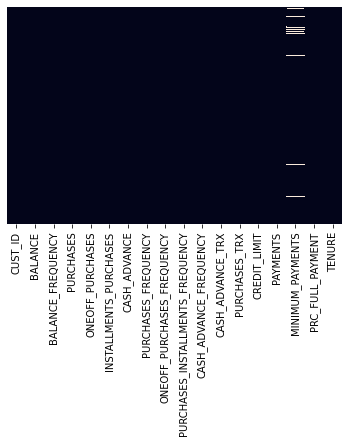

In [ ]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False)


In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].median()


In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


 - Fill out missing elements in the "CREDIT_LIMIT" column
 - Double check and make sure that no missing elements are present

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].median()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

<AxesSubplot:>

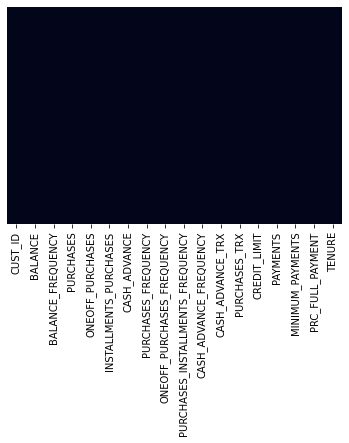

In [ ]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False)


In [ ]:

- Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [ ]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\sswar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sswar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sswar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

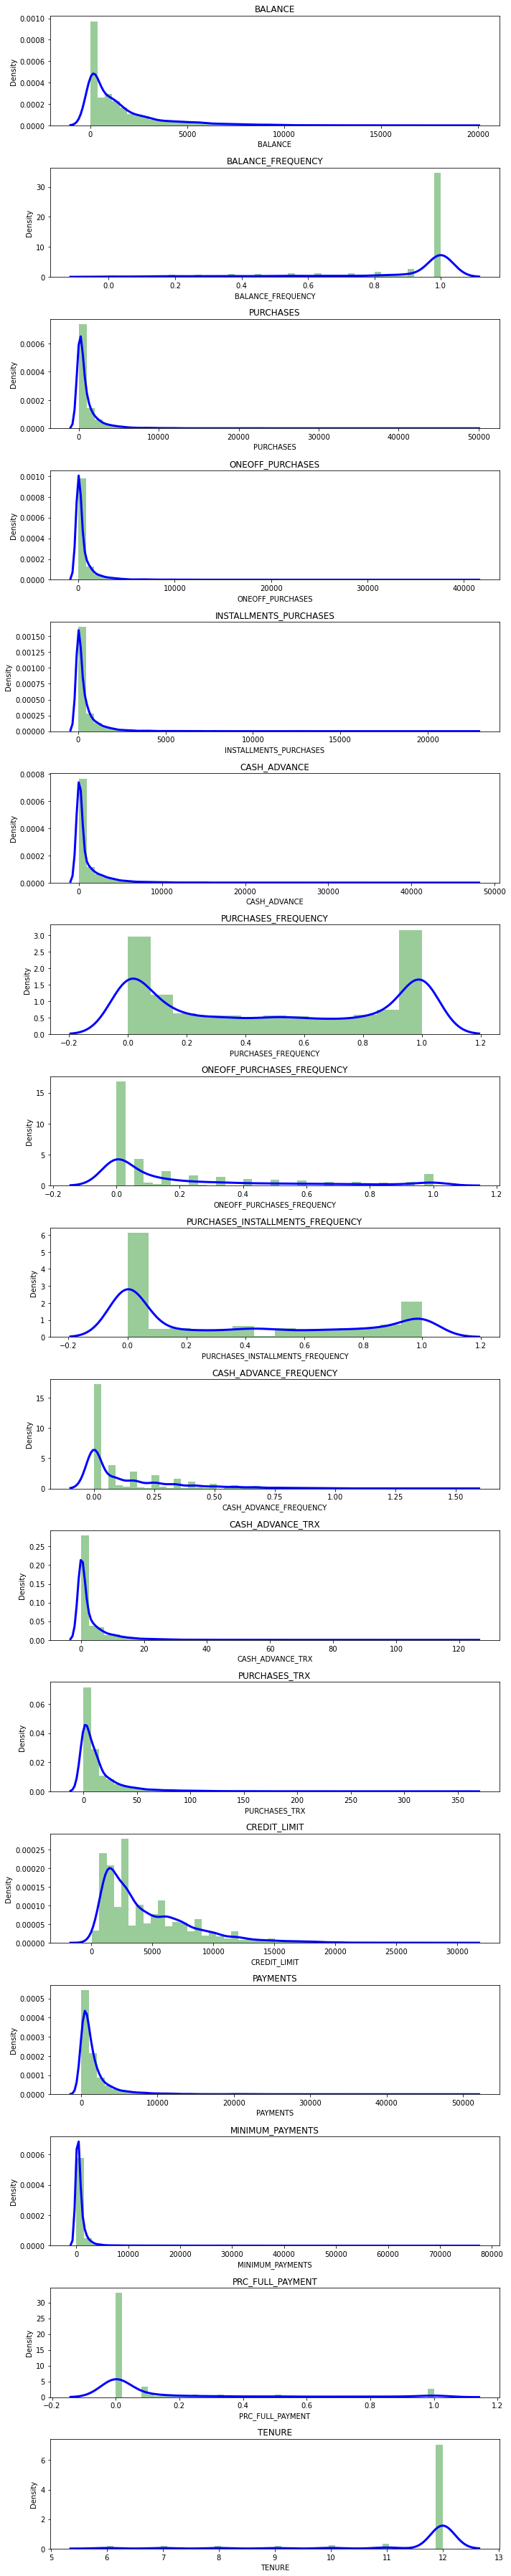

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(n):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()


- Obtain the correlation matrix between features

<AxesSubplot:>

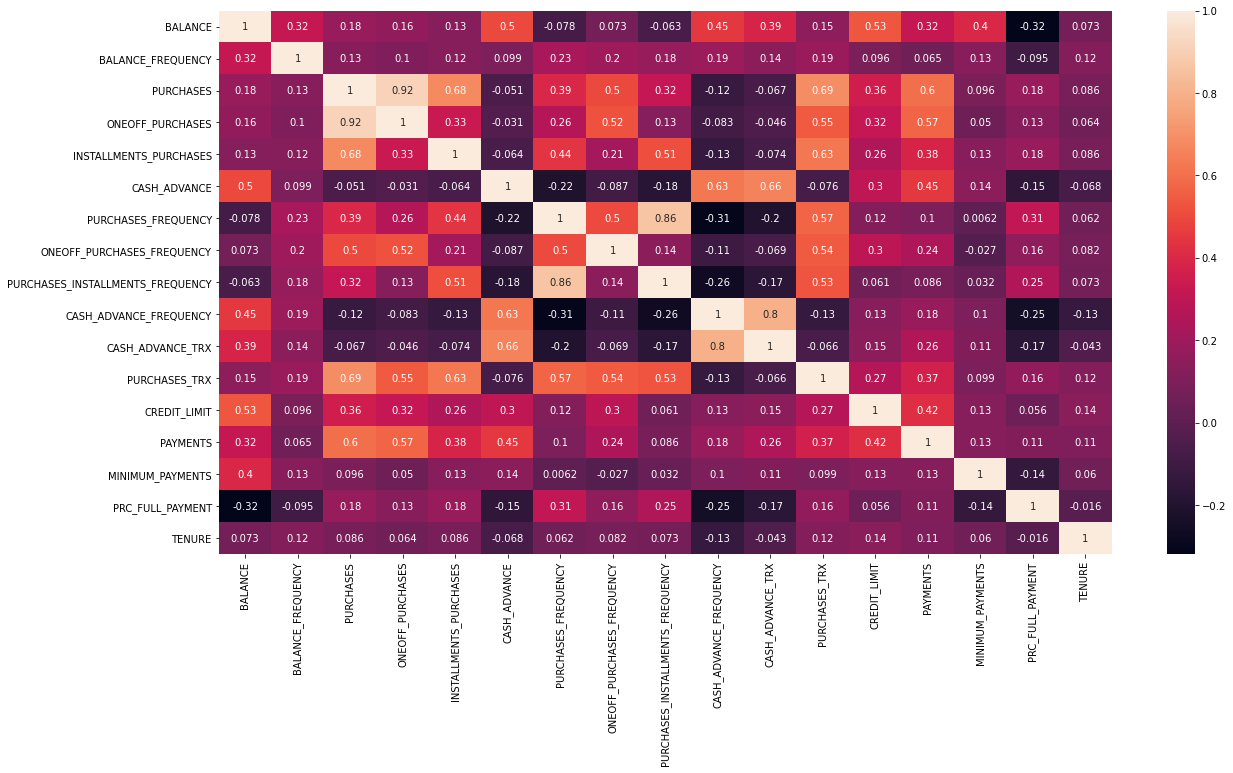

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(creditcard_df.corr(), annot=True)

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.


In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [ ]:
#f = pd.DataFrame(creditcard_df_scaled)
#f


In [ ]:
#f.max()

In [ ]:
#f.min()

In [ ]:
#from sklearn import preprocessing
#creditcard_df_scaled = preprocessing.normalize(creditcard_df,norm="l2")
#creditcard_df_scaled

In [ ]:
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#creditcard_df_scaled = scaler.fit_transform(creditcard_df)
#creditcard_df_scaled

In [ ]:
#from sklearn import preprocessing
#creditcard_df_scaled = preprocessing.normalize(creditcard_df)

#w = np.sqrt(sum(creditcard_df.to_numpy()**2))
#creditcard_df_scaled = creditcard_df/w
#creditcard_df_scaled.to_numpy()

In [ ]:
#creditcard_df_scaled2*w

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
#creditcard_df_scaled.shape

In [ ]:
#creditcard_df_scaled.isnull().sum()

In [ ]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')



# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

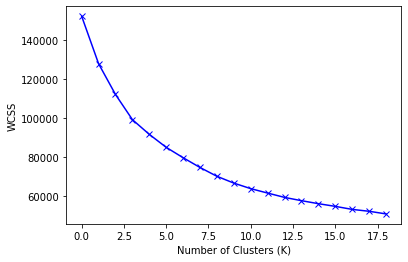

In [ ]:
scores_1 = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters (K)')
plt.plot(scores_1,'bx-')

In [ ]:
#creditcard_df_scaled.isnull().sum()

In [ ]:
#creditcard_df_scaled.loc[:,:'PURCHASES_FREQUENCY']


 - Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells. 

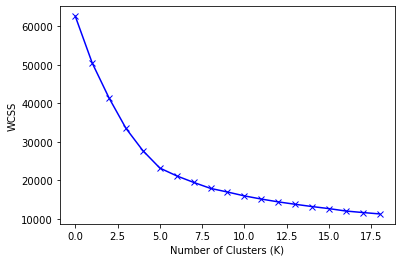

In [ ]:
scores_1 = []
for i in range(1,20):
    kmeans_tmp = KMeans(n_clusters=i)
    kmeans_tmp.fit(creditcard_df_scaled[:,:7])
    scores_1.append(kmeans_tmp.inertia_)
    
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters (K)')
plt.plot(scores_1,'bx-')

In [ ]:
"""
from sklearn.metrics import silhouette_score
no_of_clusters = [2, 3, 4, 5, 6, 7, 8]
  
for n_clusters in no_of_clusters:
  
    clustert2 = KMeans(n_clusters = n_clusters)
    clustert2.fit(creditcard_df_scaled)
    cluster_labels = clustert2.predict(creditcard_df_scaled)
    silhouette_avg = silhouette_score(creditcard_df_scaled, cluster_labels)
  
    print("For", n_clusters, "no of clusters The average silhouette_score is :", silhouette_avg)
"""


'\nfrom sklearn.metrics import silhouette_score\nno_of_clusters = [2, 3, 4, 5, 6, 7, 8]\n  \nfor n_clusters in no_of_clusters:\n  \n    clustert2 = KMeans(n_clusters = n_clusters)\n    clustert2.fit(creditcard_df_scaled)\n    cluster_labels = clustert2.predict(creditcard_df_scaled)\n    silhouette_avg = silhouette_score(creditcard_df_scaled, cluster_labels)\n  \n    print("For", n_clusters, "no of clusters The average silhouette_score is :", silhouette_avg)\n'

# APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(5)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([1, 2, 3, ..., 4, 1, 1])

In [ ]:
kmeans.cluster_centers_.shape

(5, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.410980,0.414656,7.077361,6.236596,5.273896,0.035821,1.087025,1.891663,1.045609,-0.248755,-0.045397,4.740816,2.161434,4.882121,1.095410,0.830765,0.333341
1,-0.247015,-0.339213,-0.338446,-0.220207,-0.395555,-0.172366,-0.813392,-0.352837,-0.751089,-0.085145,-0.154575,-0.472634,-0.316431,-0.250782,-0.122069,-0.283809,-0.043400
2,1.459531,0.381602,-0.242637,-0.177247,-0.248169,1.731602,-0.526088,-0.242722,-0.461901,1.777564,1.668222,-0.298588,0.833281,0.636374,0.501185,-0.403269,-0.107316
3,0.166987,0.430011,0.909174,0.845813,0.595740,-0.294790,1.082643,1.776516,0.564912,-0.382386,-0.304196,1.168179,0.690044,0.369722,-0.001204,0.381314,0.274004
4,-0.443022,0.105910,-0.098485,-0.256666,0.238633,-0.382012,0.912117,-0.398044,1.079689,-0.485500,-0.372322,0.076484,-0.356738,-0.276999,-0.078749,0.406195,-0.047188


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
#import numpy as np
#w = np.sqrt(sum(cluster_centers.to_numpy()**2))
#cluster_centers = cluster_centers*w
#cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
#cluster_centers


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4501.309782,0.975499,16124.096585,10943.910122,5180.186463,1053.988646,0.926626,0.766778,0.779989,0.085366,2.939024,132.548780,12358.536585,15866.407213,3400.127002,0.396699,11.963415
1,1050.333473,0.796914,280.108878,226.939113,53.372085,617.410762,0.163897,0.097200,0.065936,0.118106,2.193969,2.961922,3342.964477,1007.153406,560.160170,0.070706,11.459238
2,4602.366129,0.967669,484.806696,298.242933,186.651713,4610.121047,0.279206,0.130049,0.180866,0.490853,14.633218,7.288062,7526.128500,3575.384167,2014.000871,0.035765,11.373702
3,1912.043521,0.979136,2945.668869,1996.313631,949.787514,360.682123,0.924868,0.732427,0.588948,0.058625,1.172911,43.746398,7004.969217,2803.453747,842.098226,0.265242,11.884006
4,642.362411,0.902360,792.789867,166.424280,626.860518,177.774517,0.856427,0.083713,0.793533,0.037991,0.708005,16.610950,3196.311204,931.257946,661.211555,0.272520,11.454168


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

4

In [ ]:
labels.min()

0

In [ ]:
#import pandas.DataFrame.to_numpy
#x_kmeans = creditcard_df_scaled.shape.to_numpy()
#x_kmeans

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([0, 4, 3, ..., 1, 0, 0])

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


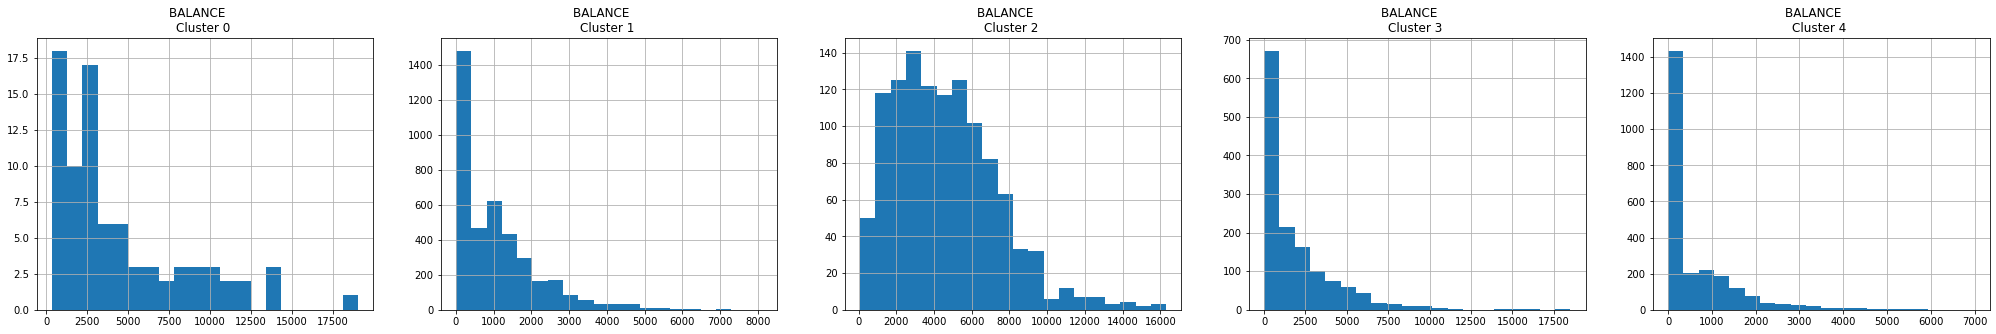

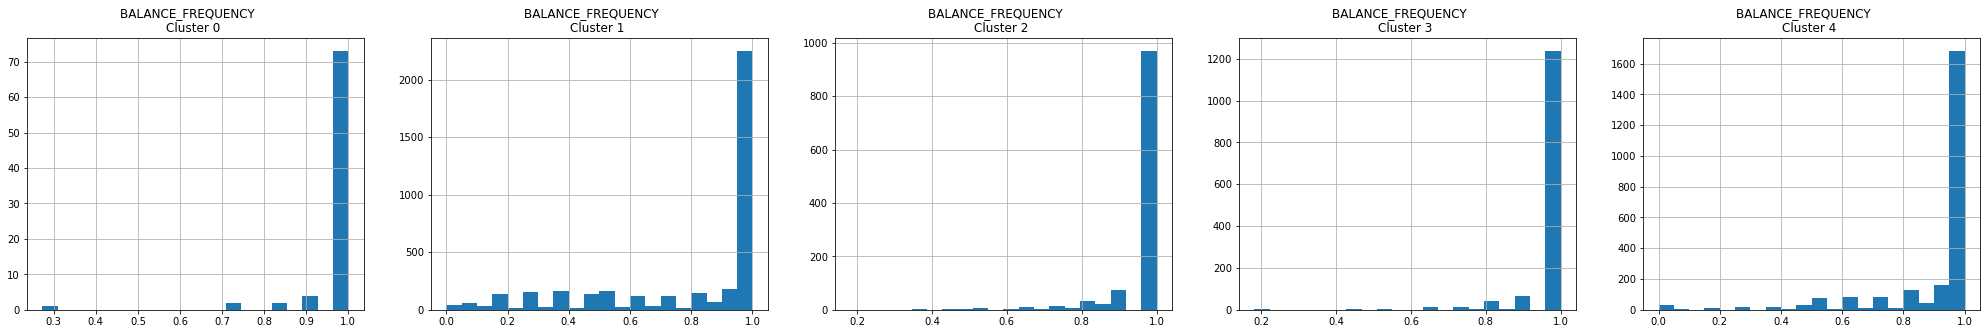

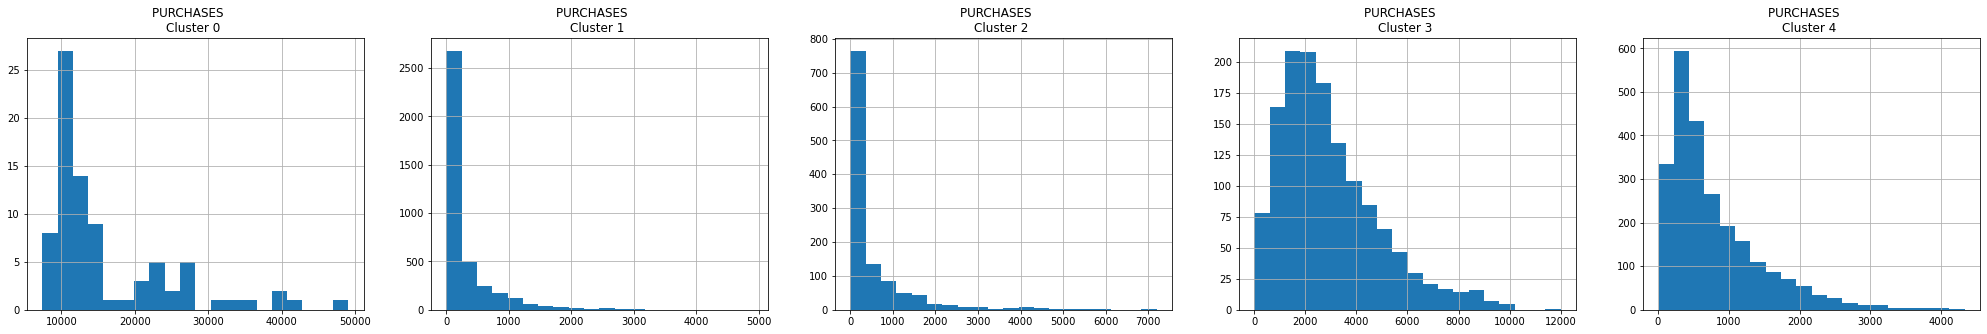

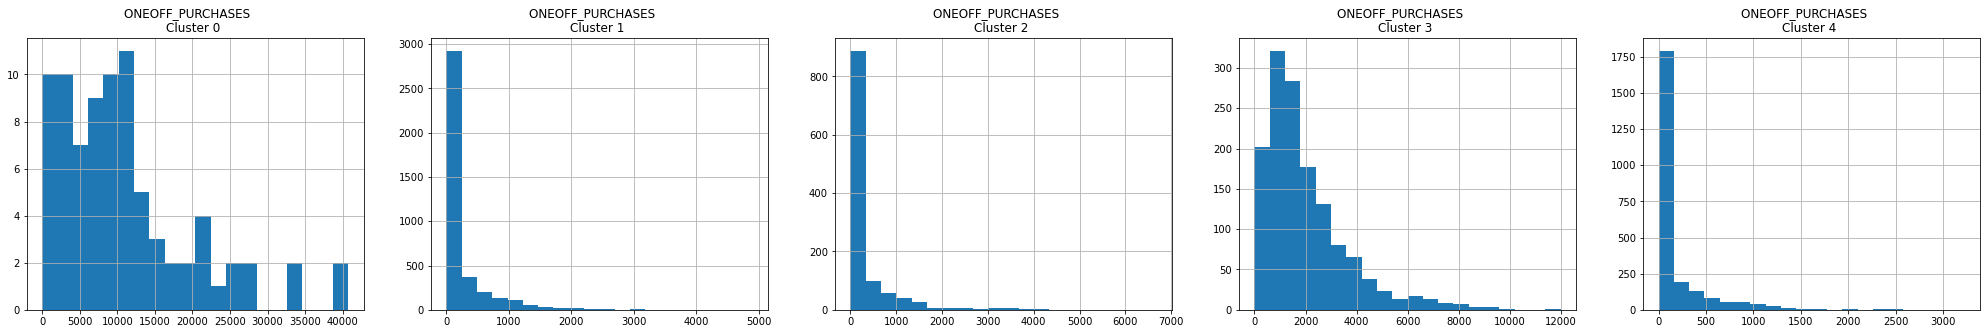

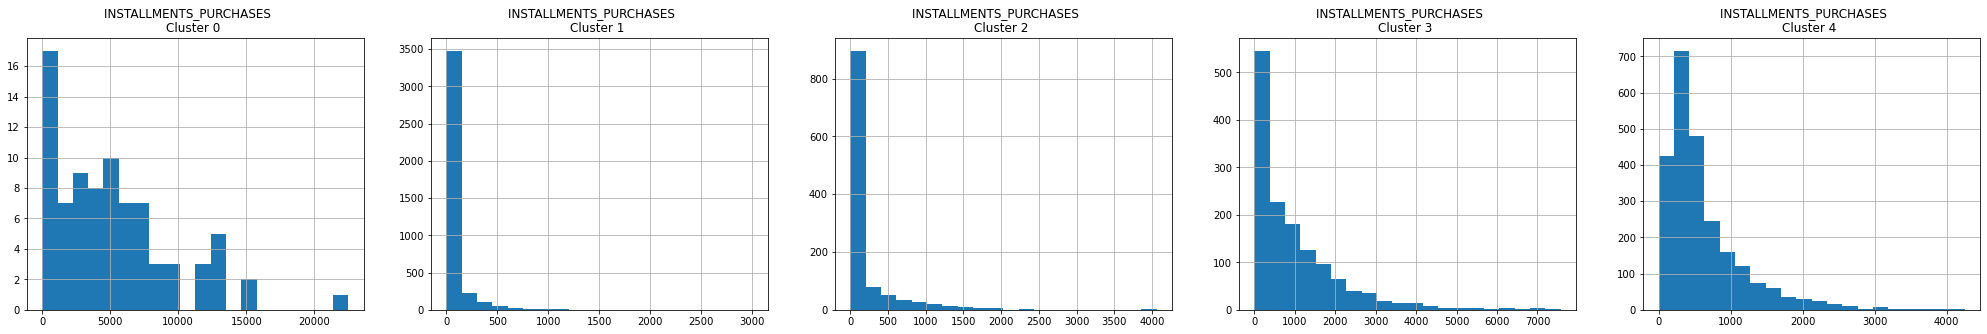

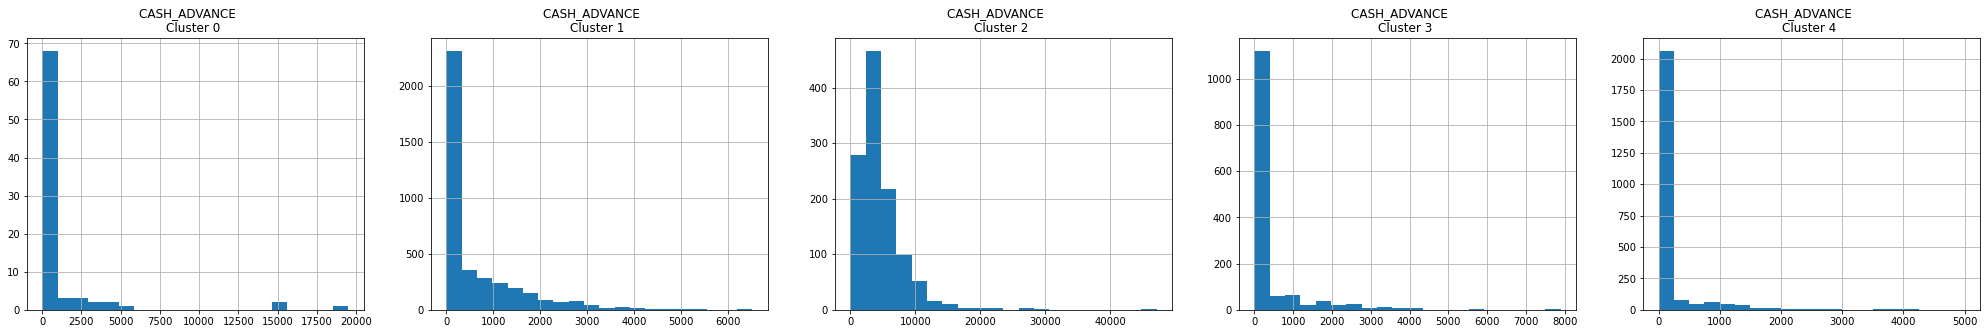

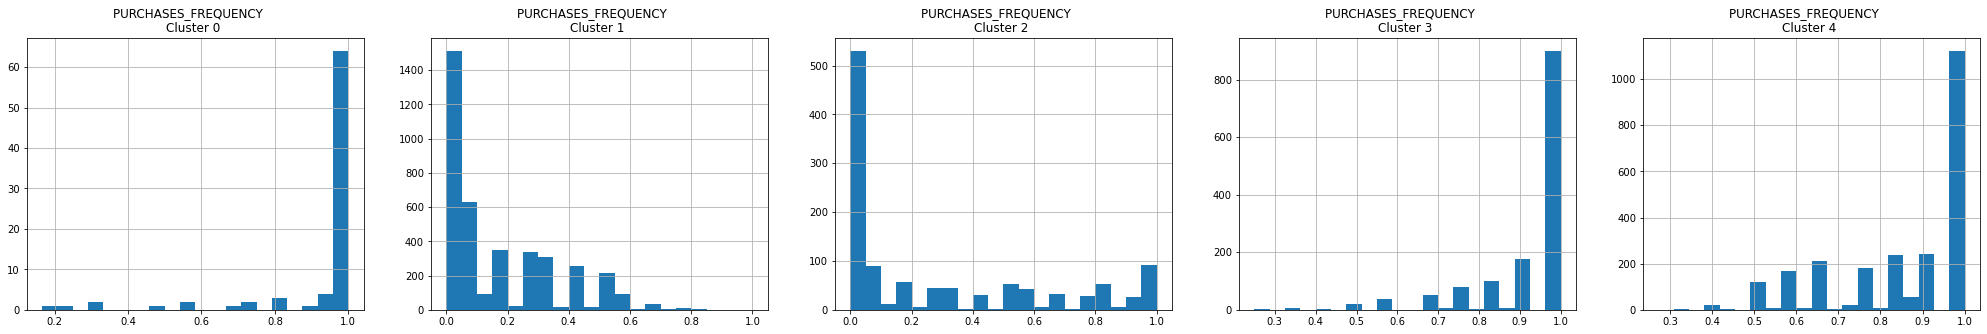

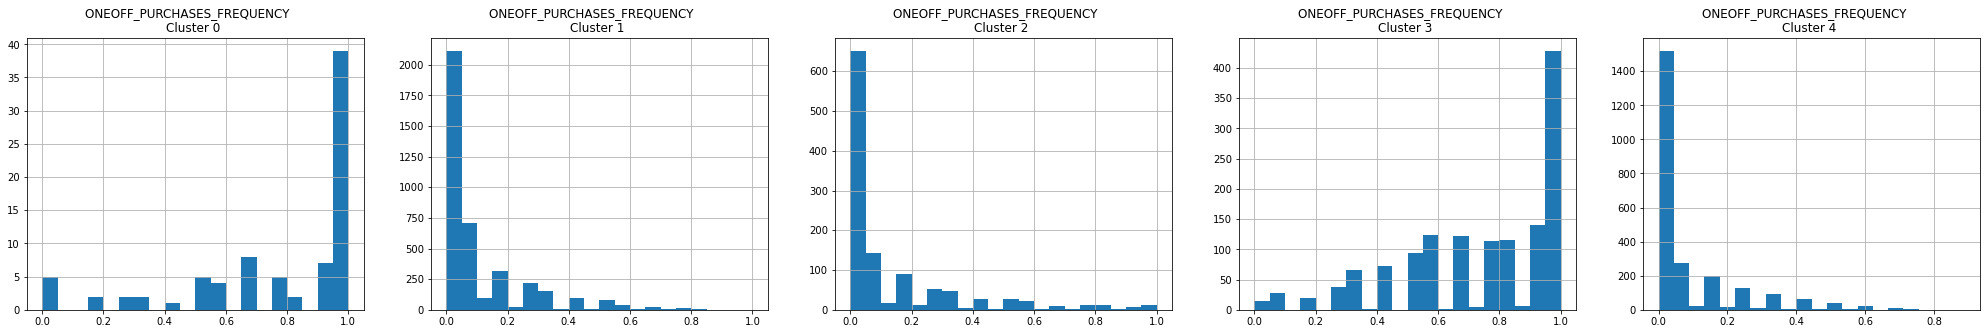

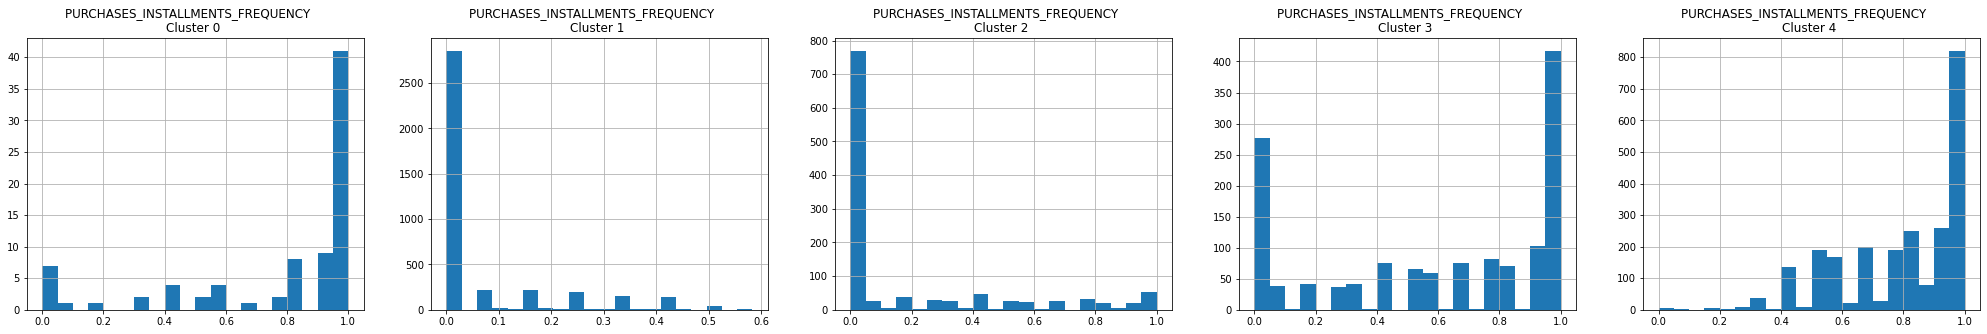

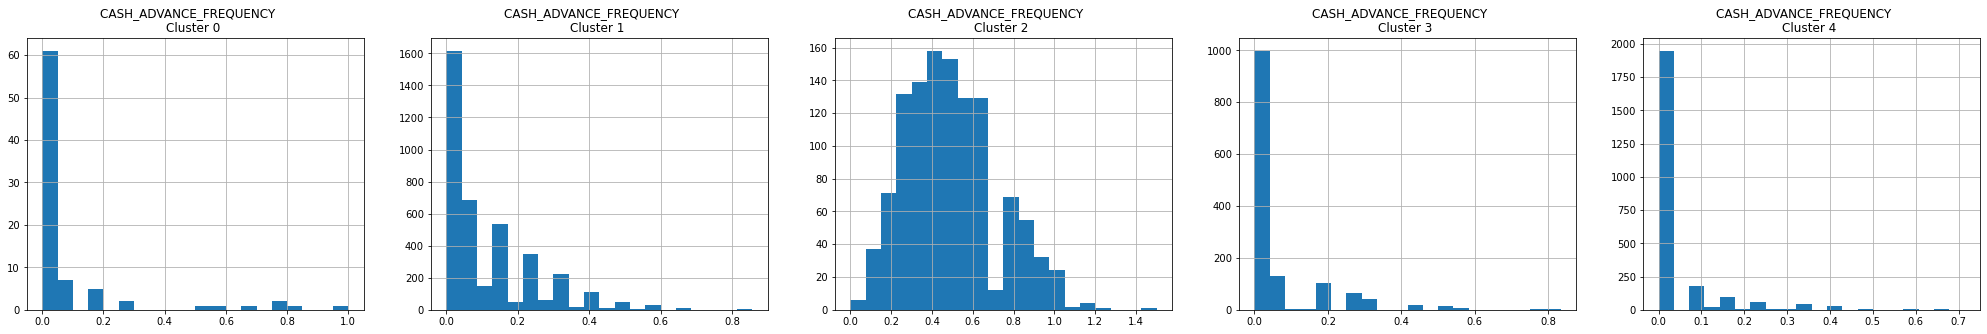

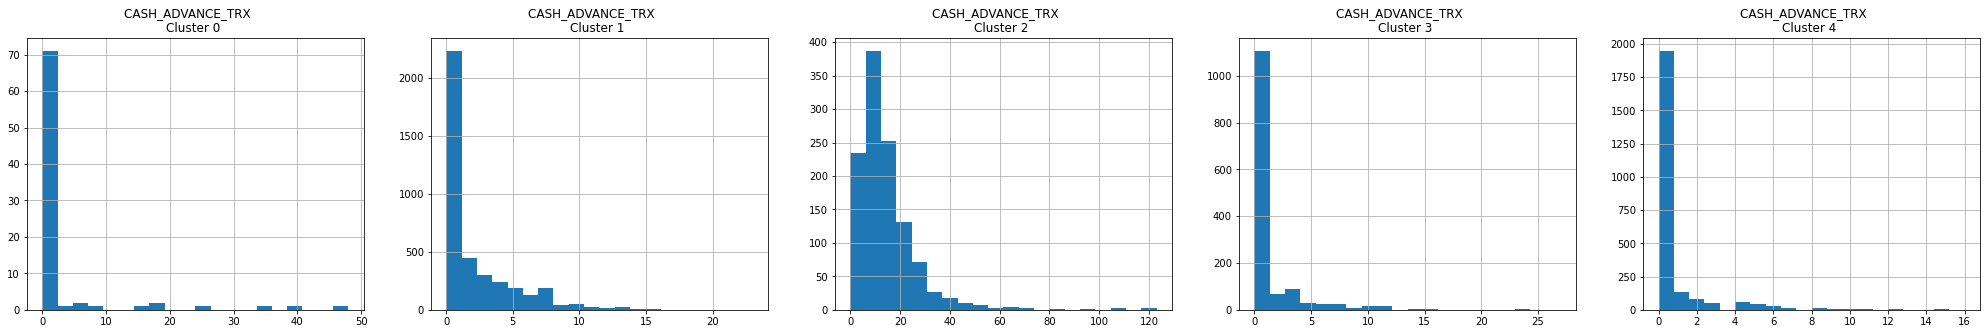

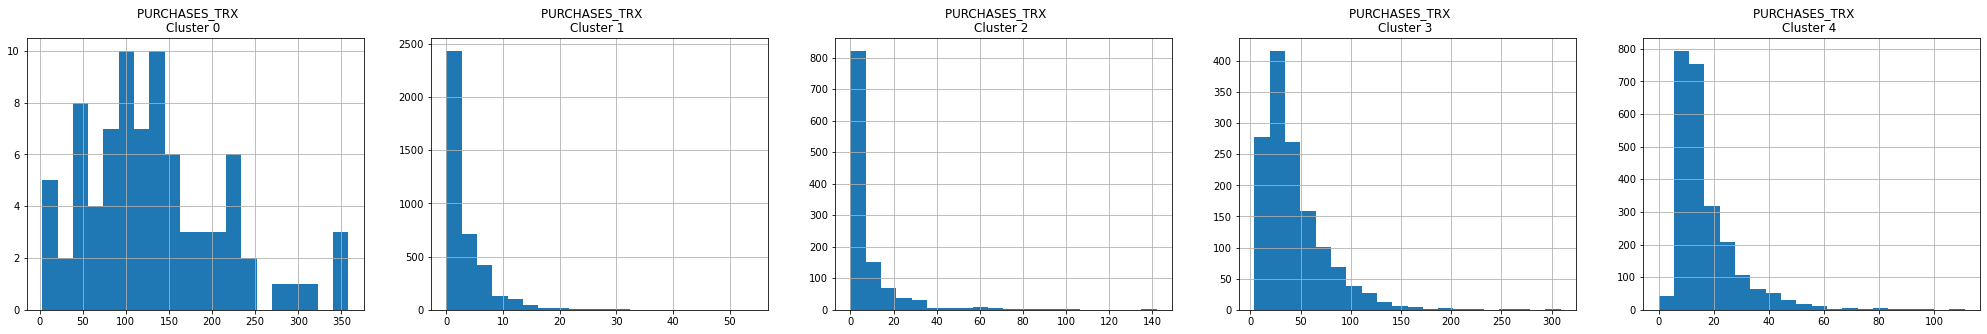

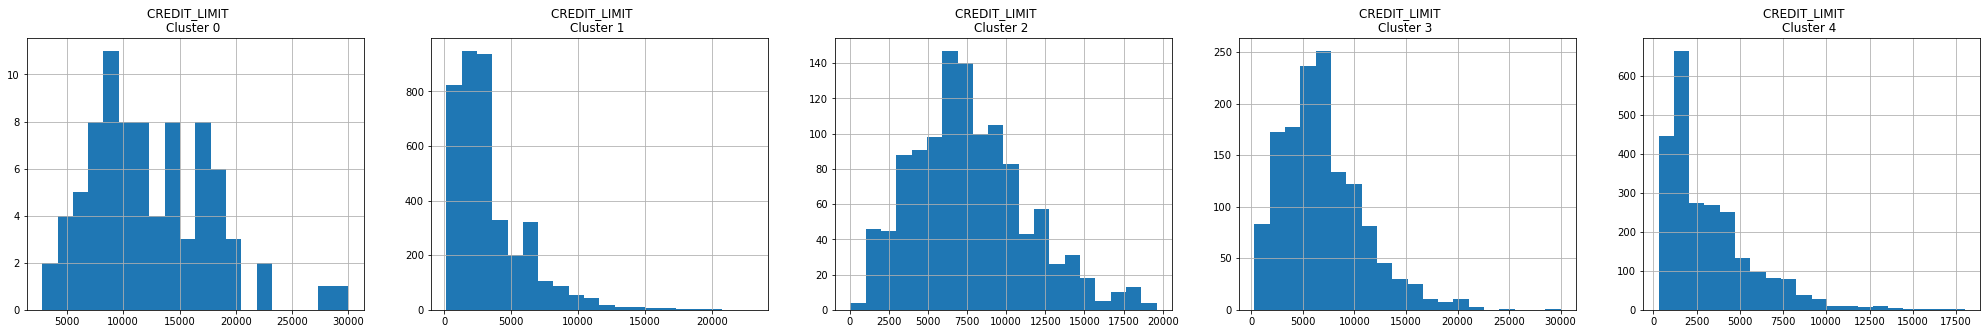

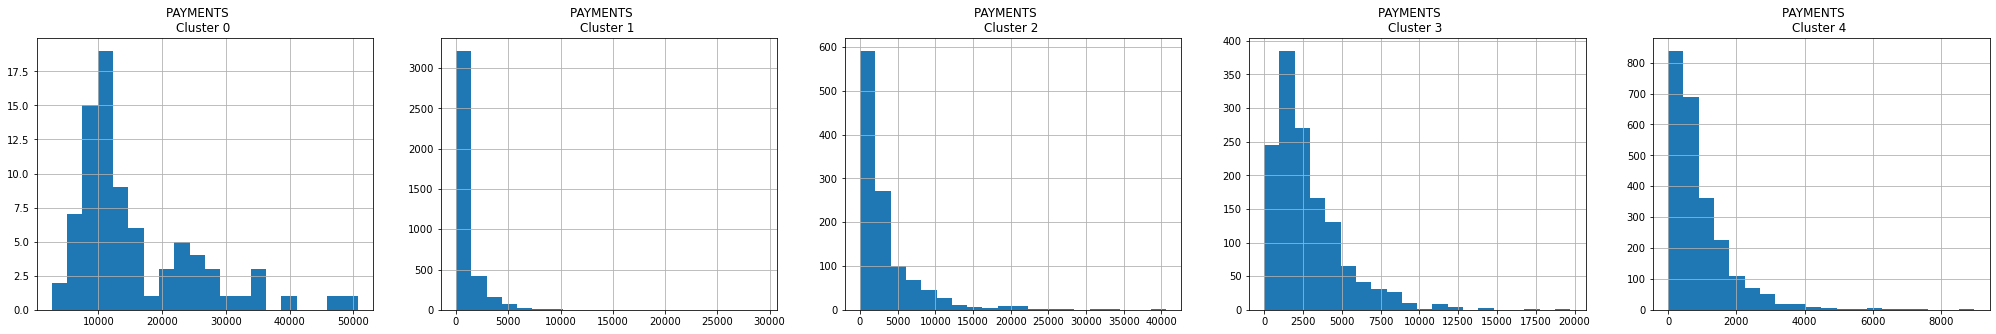

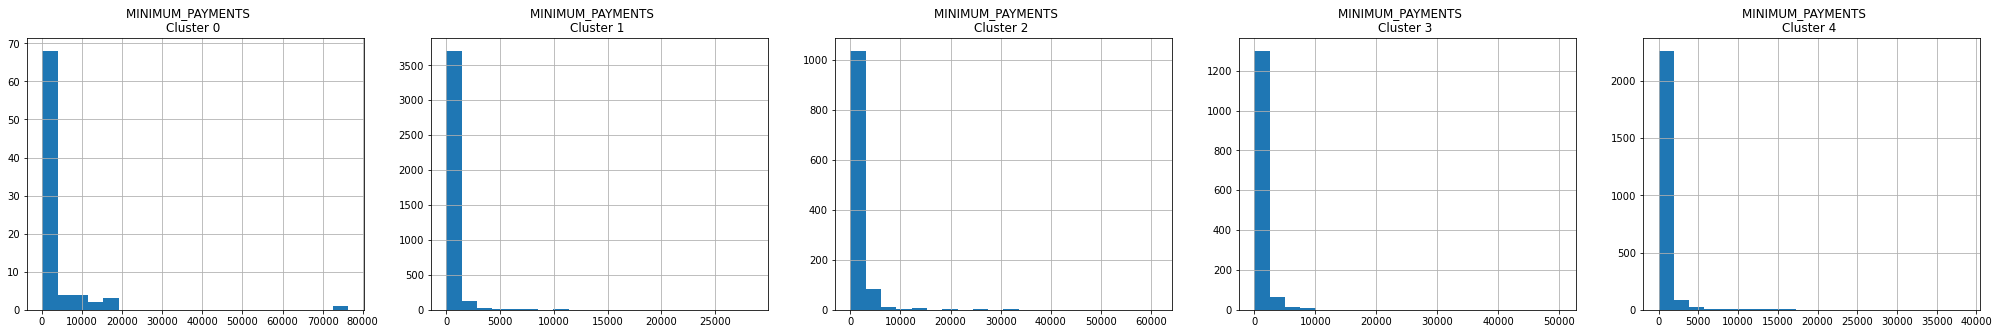

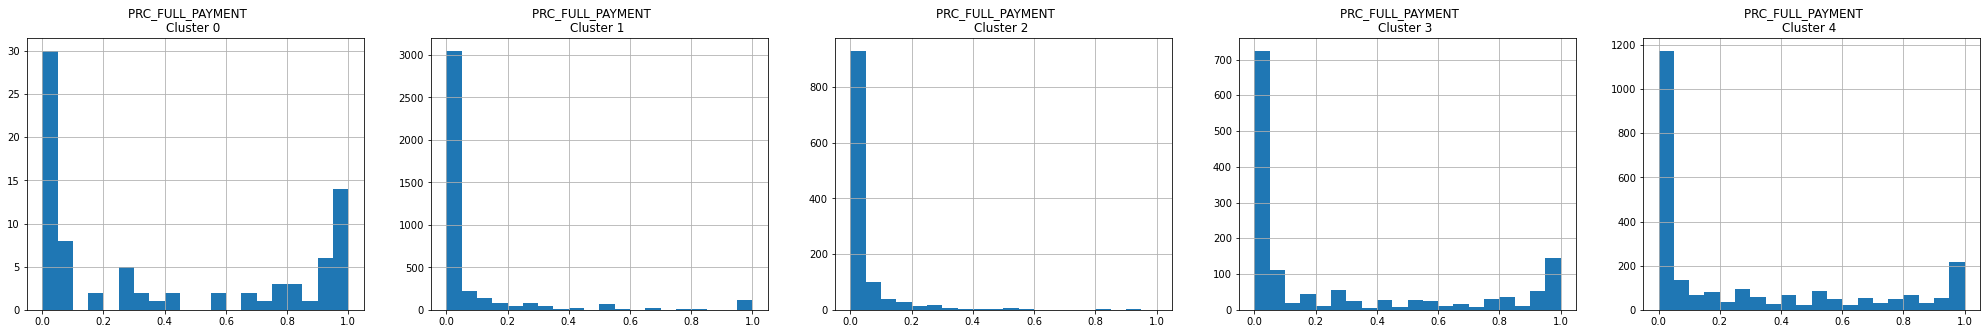

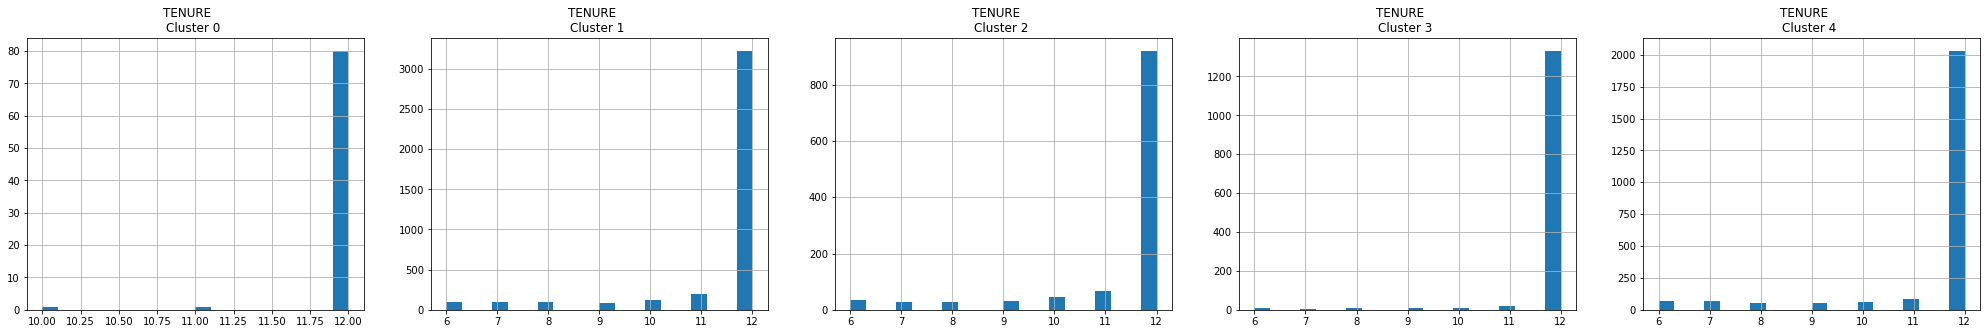

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(5):
    plt.subplot(1,5,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



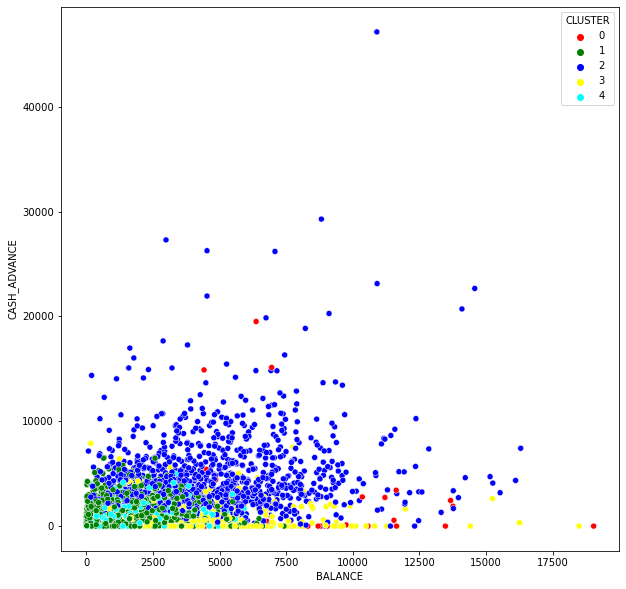

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="BALANCE", y="CASH_ADVANCE", hue="CLUSTER", data = creditcard_df_cluster, palette =['red','green','blue','yellow','cyan'])#'gray', 'black'
plt.show()

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components 
pca = PCA(5)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68364879, -1.07224149,  0.47566005,  0.6799276 ,  0.04319481],
       [-1.13408493,  2.50914981,  0.60221636, -0.10954179,  0.66263823],
       [ 0.96939499, -0.38357693,  0.09096945,  1.23835777, -2.16658706],
       ...,
       [-0.92898512, -1.80804835, -0.45824247, -2.29630167,  0.23461437],
       [-2.33784475, -0.65361132,  0.98283127, -1.84769103, -0.07027484],
       [-0.55802653, -0.40064612,  1.03364539, -1.94002698, -1.44034546]])

In [ ]:
pca.n_components_

5

In [ ]:
sum(pca.explained_variance_ratio_)

0.7012888630325639

In [ ]:
# Create a dataframe with the two components
#pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12'])
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2','pca3','pca4','pca5'])
pca_df.head()
pca_df2 = pca_df.copy()

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'CLUSTER':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,CLUSTER
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,1
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,2
2,0.969395,-0.383577,0.090969,1.238358,-2.166587,3
3,-0.888220,0.004648,1.499800,1.075271,0.225828,1
4,-1.600021,-0.683795,0.347927,1.013642,-0.453815,1


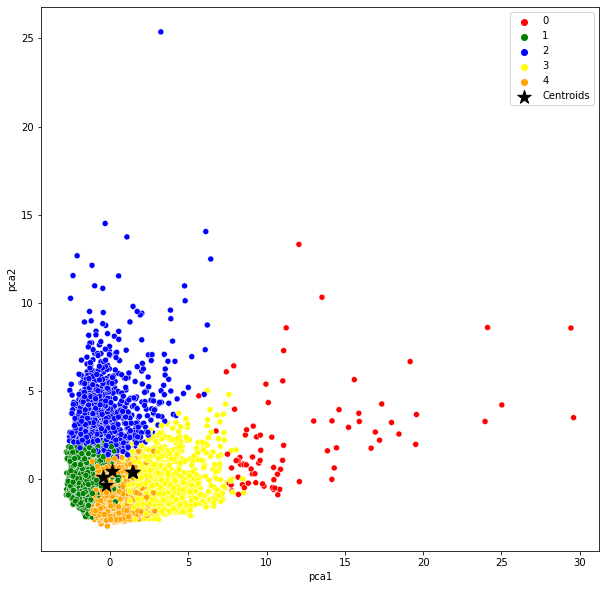

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="CLUSTER", data = pca_df, palette =['red','green','blue','yellow','orange'])#, 'gray','cyan'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker="*", s = 200, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
pca_df['pca1']

0      -1.683649
1      -1.134085
2       0.969395
3      -0.888220
4      -1.600021
          ...   
8945   -0.362572
8946   -0.580810
8947   -0.928985
8948   -2.337845
8949   -0.558027
Name: pca1, Length: 8950, dtype: float64

# Evaluation Metrics


Davies Bouldin Score:

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
db_index = davies_bouldin_score(creditcard_df_scaled, y_kmeans)
db_index

1.5476318283952537

# KMeans after PCA


In [ ]:
kmeans2 = KMeans(5)
kmeans2.fit(pca_df2)
labels = kmeans2.labels_

In [ ]:
labels

array([0, 4, 1, ..., 1, 0, 0])

In [ ]:
kmeans2.cluster_centers_.shape

(5, 5)

In [ ]:
cluster_centers2 = pd.DataFrame(data = kmeans2.cluster_centers_, columns = [pca_df2.columns])
cluster_centers2

,pca1,pca2,pca3,pca4,pca5
0,-1.327530,-0.187114,0.634275,0.349611,0.066900
1,0.652035,-1.205921,-0.806830,-0.335198,-0.007028
2,17.211524,4.151344,7.191149,0.626015,2.515948
3,4.265865,0.015778,0.241049,0.208631,-0.427334
4,-0.552489,3.482850,-0.387291,-0.452140,0.019419


In [ ]:
y_kmeans2 = kmeans.fit_predict(pca_df2)
y_kmeans2

array([1, 0, 2, ..., 2, 1, 1])

In [ ]:
db_index = davies_bouldin_score(pca_df, y_kmeans)
db_index

1.096791147260366

# K-Means Prediction

In [ ]:
creditcard_test = pd.read_csv('Marketing_data2.csv')

In [ ]:
creditcard_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           11 non-null     object 
 1   BALANCE                           11 non-null     float64
 2   BALANCE_FREQUENCY                 11 non-null     float64
 3   PURCHASES                         11 non-null     float64
 4   ONEOFF_PURCHASES                  11 non-null     float64
 5   INSTALLMENTS_PURCHASES            11 non-null     float64
 6   CASH_ADVANCE                      11 non-null     float64
 7   PURCHASES_FREQUENCY               11 non-null     float64
 8   ONEOFF_PURCHASES_FREQUENCY        11 non-null     float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  11 non-null     float64
 10  CASH_ADVANCE_FREQUENCY            11 non-null     float64
 11  CASH_ADVANCE_TRX                  11 non-null     int64  
 12  PURCHASES_

In [ ]:
creditcard_test=creditcard_test.drop('CUST_ID',axis=1)

In [ ]:
creditcard_test_scaled = scaler.fit_transform(creditcard_test)
creditcard_test_scaled

array([[-1.39625493, -0.52558833, -0.63421325, -0.53707403, -0.54455449,
        -0.32720748, -0.80737255, -0.59146713, -0.63719373, -0.41256821,
        -0.3928371 , -0.51259044, -1.09982853, -0.7281513 , -0.7405545 ,
        -0.38554974,  0.        ],
       [-1.02849379,  0.05255883, -0.68441313, -0.53707403, -0.76233644,
         3.16067174, -1.21106003, -0.59146713, -0.83189083,  2.99112292,
         3.06412939, -0.62766176,  0.35194513,  1.38957977,  0.44277936,
         0.38554911,  0.        ],
       [ 1.85284405,  0.630706  , -0.27756789, -0.10752804, -0.76233644,
        -0.32720748,  1.21106003,  2.10072882, -0.83189083, -0.41256821,
        -0.3928371 ,  0.06276618,  0.47292627, -0.50001622, -0.1217918 ,
        -0.38554974,  0.        ],
       [ 0.75515412, -1.68188266,  0.10436685,  0.29571751, -0.76233644,
        -0.21580443, -1.0092175 , -0.36711836, -0.83189083,  0.72199096,
         0.47140452, -0.5701261 ,  0.47292627, -0.83769687, -0.72724723,
        -0.38554974

In [ ]:
pca2 = PCA(5)
principal_comp2 = pca2.fit_transform(creditcard_test_scaled)

In [ ]:
pca_df_test = pd.DataFrame(principal_comp2, columns = ['pca1','pca2','pca3','pca4','pca5'])
pca_df_test

,pca1,pca2,pca3,pca4,pca5
0,-1.837293,0.054802,-1.203125,-1.253092,0.957054
1,-1.999748,4.458093,3.444233,0.468721,0.184482
2,0.568197,-0.940084,-1.009137,3.076987,-0.015489
3,-1.371574,1.241216,-1.336971,0.392302,-1.397153
4,-1.685783,-0.264816,-0.853307,-0.184139,1.431000
5,0.038670,-2.703645,1.944729,-0.546246,-1.022805
6,7.412224,1.710772,-0.116473,-0.476252,0.294088
7,0.008853,-2.117823,0.456868,0.267726,0.467439
8,-0.588739,-0.276408,-0.769574,-0.001501,0.571470
9,-0.791920,1.565871,-2.355027,-1.052314,-1.142844


In [ ]:
test_predict = kmeans.predict(pca_df_test)

In [ ]:
test_predict

array([1, 0, 2, 1, 1, 2, 4, 2, 2, 0, 2])

In [ ]:
pca_df_test

,pca1,pca2,pca3,pca4,pca5
0,-1.837293,0.054802,-1.203125,-1.253092,0.957054
1,-1.999748,4.458093,3.444233,0.468721,0.184482
2,0.568197,-0.940084,-1.009137,3.076987,-0.015489
3,-1.371574,1.241216,-1.336971,0.392302,-1.397153
4,-1.685783,-0.264816,-0.853307,-0.184139,1.431000
5,0.038670,-2.703645,1.944729,-0.546246,-1.022805
6,7.412224,1.710772,-0.116473,-0.476252,0.294088
7,0.008853,-2.117823,0.456868,0.267726,0.467439
8,-0.588739,-0.276408,-0.769574,-0.001501,0.571470
9,-0.791920,1.565871,-2.355027,-1.052314,-1.142844


In [ ]:
pca_df4 = pd.concat([creditcard_test,pd.DataFrame({'CLUSTER':test_predict})], axis = 1)
pca_df4

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,42.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12,1
1,320.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,150.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.057770,2407.246035,0.000000,12,2
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.314328,198.065894,1.000000,12,4
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.065082,532.033990,0.000000,12,2
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.278568,311.963409,0.000000,12,2
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000,1164.770591,100.302262,0.000000,12,0


# Info about clusters and Market Strategies

In [ ]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4501.309782,0.975499,16124.096585,10943.910122,5180.186463,1053.988646,0.926626,0.766778,0.779989,0.085366,2.939024,132.548780,12358.536585,15866.407213,3400.127002,0.396699,11.963415
1,1050.333473,0.796914,280.108878,226.939113,53.372085,617.410762,0.163897,0.097200,0.065936,0.118106,2.193969,2.961922,3342.964477,1007.153406,560.160170,0.070706,11.459238
2,4602.366129,0.967669,484.806696,298.242933,186.651713,4610.121047,0.279206,0.130049,0.180866,0.490853,14.633218,7.288062,7526.128500,3575.384167,2014.000871,0.035765,11.373702
3,1912.043521,0.979136,2945.668869,1996.313631,949.787514,360.682123,0.924868,0.732427,0.588948,0.058625,1.172911,43.746398,7004.969217,2803.453747,842.098226,0.265242,11.884006
4,642.362411,0.902360,792.789867,166.424280,626.860518,177.774517,0.856427,0.083713,0.793533,0.037991,0.708005,16.610950,3196.311204,931.257946,661.211555,0.272520,11.454168


In [ ]:
"""
First cluster (VIP): These are the customers with highest credit limit(~$ 12000) and highest purchases (~$ 16000) and 
high one-off purchase(~$ 11000),high payments(~$ 16000), second highest balance (~$ 4500).

Target: Try to increase their credit limit and increase spending habits, These customers have to be retained for sure.

Second cluster (Transactors): These are the customers who does less purchases using credit card(~$ 280), less purchase 
frequency(~ 16 percent), less one off purchase(~$ 225), less percent of purchase installment frequency(~ 3).

Target: Give more offers for purchases on various shops, e-commerce sites

Third customer cluster (Prime): These are the customers with highest balance(~$ 4600) and highest cash advance frequency
(~ 50%) and cash advance transactions(~$ 15), and with second highest credit limit(~$ 7500) and payments(~$ 3500).

Target: Availing much more benefits to them so that they become VIP 

Fourth customer cluster (pro): These are the customers with highest balance frequency(~ 98 percent), second highest 
purchases(~$ 3000) and oneoff purchases(~$ 2000), with second highest purchase transactions(~ 44).  

Target: 

Fifth customer cluster (Novice): These are customers with low balance(~$ 640) who pay less interest, low cash advance
(~$ 180), low cash advance frequency(~4 percent), lowest credit limit(~$ 3200)

Target: Making them habituated to much more facilities provided by the bank, 
decreasing interest rates to increase their balance.


"""


'\nFirst cluster (VIP): These are the customers with highest credit limit(~$ 12000) and highest purchases (~$ 16000) and high one-off purchase(~$ 11000),high payments(~$ 16000), second highest balance (~$ 4500).\nTarget: Try to increase their credit limit and increase spending habits, These customers have to be retained for sure.\n\nSecond cluster (Transactors): These are the customers who does less purchases using credit card(~$ 280), less purchase frequency(~ 16 percent), less one off purchase(~$ 225), less percent of purchase installment frequency(~ 3).\nTarget: Give more offers for purchases on various shops, e-commerce sites\n\nThird customer cluster (Prime): These are the customers with highest balance(~$ 4600) and highest cash advance frequency(~ 50%) and cash advance transactions(~$ 15), and with second highest credit limit(~$ 7500) and payments(~$ 3500).\nTarget: Availing much more benefits to them so that they become VIP \n\nFourth customer cluster (pro): These are the custom